# Asset Pricing: Empirical Analysis #2
## Fators Models (Fama French model)

#### Authors : Gwendoline Valentin, Clarisse Acknin, Hugo Michel

### Setup environement

Install yahoo finance API to collect stocks data

In [1]:
#!pip install yfinance

In [2]:
# basic libs
import pandas as pd
import numpy as np
from datetime import datetime

# stats libs
import statsmodels.api as sm


# import yahoo finance to collect stocks data
import yfinance as yf

The Fama-French Three-factor Model is an extension of the Capital Asset Pricing Model (CAPM). The Fama-French model aims to describe stock returns through three factors: market risk, the outperformance of small-cap companies relative to large-cap companies, and the outperformance of high book-to-market value companies versus low book-to-market value companies. The rationale behind the model is that high value and small-cap companies tend to regularly outperform the overall market.

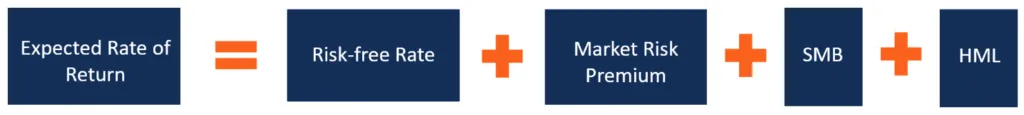

### Get stocks data from API Yahoo Finance 

To apply a Facors model we have to build a portfolio first.
To constitute the portfolio, we propose to select companies with differents capitalization

Market capitalization is typically expressed in terms of billions (B), millions (M), or even trillions (T) of dollars, depending on the size of the company. It categorizes companies into different size classes:

* Large-Cap (Large Capitalization): Market cap typically over \$10 billions.
* Mid-Cap (Medium Capitalization): Market cap typically between \$2 billions and 10 billion.
* Small-Cap (Small Capitalization): Market cap typically under \$2 billions.

Market capitalization is an important metric for investors, analysts, and researchers as it provides insights into the size and scale of a company. It's widely used for categorizing stocks and understanding their relative risk and growth potential.

According these three size classes we select the following companies:

**Large Cap stocks (> $10 billions)**
* LVMH (MC.PA)
* L'Oréal (OR.PA)
* Hermès (RMS.PA)
* Total Energies (TTE)
* Sanofi (SNY)
* Dior (CDI.PA)
* Schneider Electric (SU.PA)
* Air Liquide (AI.PA)
* BNP Paribas (BNP.PA)
* Crédit Agricole (ACA.PA)


**Mid Cap Stocks (between 10 billions and $2 billions)**
* Arkema (AKE.PA)
* Klépierre (LI.PA)
* FDJ (FDJ.PA)
* Teleperformance (TEP.PA)
* Groupe SEB (SK.PA)
* Scor (SRC.PA)
* SPIE (SPIE.PA)
* Rexel (RXL.PA)
* Alten (ATE.PA)
* Colas (RE.PA)


**Small Cap Stocks (< $2 billions)**
* Olympique Lyonnais (OLG.PA)
* Fnac Darty (FNAC.PA)
* Atos (ATO.PA)
* Criteo (CRTO)
* Rémy Cointreau (RCO.PA)
* OVH Groupe (OVH.PA)
* Rubis (RUI.PA)
* Icade (ICAD.PA)
* BIC (BB.PA)
* Ubisoft (UBI.PA)


In fact our portfolio contains, 10 Large Cap stocks, 10 Mid-Cap stocks and 10 Small-Cap stocks 

Regarding the period we chose the following period: from 2022-01-01 2023-09-01 in order to study the post covid impact. We stop our analysis at 2023-09-01 because we don't have the interest rate for France after this data.

Regarding the frequency of data collection, we have chosen to concentrate on a daily frequency for obvious reasons of data volume. A lower frequency would pose problems for calculation and storage performance on our personal computers.

To collect the stocks of the previous companies we use the `API of Yahoo Finance`

In [3]:
symbols = ["MC.PA", "OR.PA", "RMS.PA", "TTE", "SNY", "CDI.PA", "SU.PA", "AI.PA", "BNP.PA", "CA.PA", "AKE.PA", "LI.PA", "FDJ.PA", "TEP.PA", "SK.PA", "SPIE.PA", "RXL.PA", "ATE.PA", "RE.PA", "FR.PA", "OLG.PA", "FNAC.PA", "ATO.PA", "CRTO", "RCO.PA", "OVH.PA", "RUI.PA", "ICAD.PA", "BB.PA", "UBI.PA"]
start_date = "2022-01-01"
end_date = "2023-09-01"

In [4]:
lvmh = yf.Ticker("MC.PA").history(start=start_date, end=end_date, interval='1d')
loreal = yf.Ticker("OR.PA").history(start=start_date, end=end_date, interval='1d')
hermes = yf.Ticker("RMS.PA").history(start=start_date, end=end_date, interval='1d')
tolal = yf.Ticker("TTE").history(start=start_date, end=end_date, interval='1d')
sanofi = yf.Ticker("SNY").history(start=start_date, end=end_date, interval='1d')
dior = yf.Ticker("CDI.PA").history(start=start_date, end=end_date, interval='1d')
schneider_elec = yf.Ticker("SU.PA").history(start=start_date, end=end_date, interval='1d')
air_liquide = yf.Ticker("AI.PA").history(start=start_date, end=end_date, interval='1d')
bnp_paribas = yf.Ticker("BNP.PA").history(start=start_date, end=end_date, interval='1d')
credit_agricole = yf.Ticker("CA.PA").history(start=start_date, end=end_date, interval='1d')


arkema = yf.Ticker("AKE.PA").history(start=start_date, end=end_date, interval='1d')
klepierre = yf.Ticker("LI.PA").history(start=start_date, end=end_date, interval='1d')
fdj = yf.Ticker("FDJ.PA").history(start=start_date, end=end_date, interval='1d')
teleperformance = yf.Ticker("TEP.PA").history(start=start_date, end=end_date, interval='1d')
groupe_seb = yf.Ticker("SK.PA").history(start=start_date, end=end_date, interval='1d')
spie = yf.Ticker("SPIE.PA").history(start=start_date, end=end_date, interval='1d')
rexel = yf.Ticker("RXL.PA").history(start=start_date, end=end_date, interval='1d')
alten = yf.Ticker("ATE.PA").history(start=start_date, end=end_date, interval='1d')
colas = yf.Ticker("RE.PA").history(start=start_date, end=end_date, interval='1d')
valeo = yf.Ticker("FR.PA").history(start=start_date, end=end_date, interval='1d')

ol = yf.Ticker("OLG.PA").history(start=start_date, end=end_date, interval='1d')
fnac_darty = yf.Ticker("FNAC.PA").history(start=start_date, end=end_date, interval='1d')
atos = yf.Ticker("ATO.PA").history(start=start_date, end=end_date, interval='1d')
fnac_darty = yf.Ticker("FNAC.PA").history(start=start_date, end=end_date, interval='1d')
criteo = yf.Ticker("CRTO").history(start=start_date, end=end_date, interval='1d')
remy_cointreau = yf.Ticker("RCO.PA").history(start=start_date, end=end_date, interval='1d')
ovh_groupe = yf.Ticker("OVH.PA").history(start=start_date, end=end_date, interval='1d')
rubis = yf.Ticker("RUI.PA").history(start=start_date, end=end_date, interval='1d')
icade = yf.Ticker("ICAD.PA").history(start=start_date, end=end_date, interval='1d')
bic = yf.Ticker("BB.PA").history(start=start_date, end=end_date, interval='1d')
ubisoft = yf.Ticker("UBI.PA").history(start=start_date, end=end_date, interval='1d')

### Let's visualize the output for `BIC` stock

In [5]:
bic

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00+01:00,43.505773,44.112574,43.340282,43.855145,38866,0.0,0.0
2022-01-04 00:00:00+01:00,44.241287,44.903252,42.972524,43.505772,78283,0.0,0.0
2022-01-05 00:00:00+01:00,43.671264,44.866477,43.634487,44.094185,70955,0.0,0.0
2022-01-06 00:00:00+01:00,43.836755,44.259676,43.487384,44.094185,47330,0.0,0.0
2022-01-07 00:00:00+01:00,44.259673,44.351615,43.708038,44.314838,21717,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-25 00:00:00+02:00,57.799999,58.250000,57.700001,58.150002,15661,0.0,0.0
2023-08-28 00:00:00+02:00,58.250000,58.799999,58.099998,58.500000,17023,0.0,0.0
2023-08-29 00:00:00+02:00,58.599998,59.000000,58.099998,58.750000,24606,0.0,0.0


### Computing Market Cap for each stocks over the period of time mentioned previously

$Market Cap = TotalShares \times ValuePerShare$

In [6]:
lvmh["Cum_Sum_Volume"] = lvmh["Volume"].cumsum(axis=0)
lvmh["Market_Cap"] = lvmh["Close"] * lvmh["Cum_Sum_Volume"]
lvmh_market_cap = lvmh["Market_Cap"].mean()

loreal["Cum_Sum_Volume"] = loreal["Volume"].cumsum(axis=0)
loreal["Market_Cap"] = loreal["Close"] * loreal["Cum_Sum_Volume"]
loreal_market_cap = loreal["Market_Cap"].mean()

hermes["Cum_Sum_Volume"] = hermes["Volume"].cumsum(axis=0)
hermes["Market_Cap"] = hermes["Close"] * hermes["Cum_Sum_Volume"]
hermes_market_cap = hermes["Market_Cap"].mean()

tolal["Cum_Sum_Volume"] = tolal["Volume"].cumsum(axis=0)
tolal["Market_Cap"] = tolal["Close"] * tolal["Cum_Sum_Volume"]
tolal_market_cap = tolal["Market_Cap"].mean()

sanofi["Cum_Sum_Volume"] = sanofi["Volume"].cumsum(axis=0)
sanofi["Market_Cap"] = sanofi["Close"] * sanofi["Cum_Sum_Volume"]
sanofi_market_cap = sanofi["Market_Cap"].mean()

dior["Cum_Sum_Volume"] = dior["Volume"].cumsum(axis=0)
dior["Market_Cap"] = dior["Close"] * dior["Cum_Sum_Volume"]
dior_market_cap = dior["Market_Cap"].mean()

schneider_elec["Cum_Sum_Volume"] = schneider_elec["Volume"].cumsum(axis=0)
schneider_elec["Market_Cap"] = schneider_elec["Close"] * schneider_elec["Cum_Sum_Volume"]
schneider_elec_market_cap = schneider_elec["Market_Cap"].mean()

air_liquide["Cum_Sum_Volume"] = air_liquide["Volume"].cumsum(axis=0)
air_liquide["Market_Cap"] = air_liquide["Close"] * air_liquide["Cum_Sum_Volume"]
air_liquide_market_cap = air_liquide["Market_Cap"].mean()

bnp_paribas["Cum_Sum_Volume"] = bnp_paribas["Volume"].cumsum(axis=0)
bnp_paribas["Market_Cap"] = bnp_paribas["Close"] * bnp_paribas["Cum_Sum_Volume"]
bnp_paribas_market_cap = bnp_paribas["Market_Cap"].mean()

credit_agricole["Cum_Sum_Volume"] = credit_agricole["Volume"].cumsum(axis=0)
credit_agricole["Market_Cap"] = credit_agricole["Close"] * credit_agricole["Cum_Sum_Volume"]
credit_agricole_market_cap = credit_agricole["Market_Cap"].mean()

arkema["Cum_Sum_Volume"] = arkema["Volume"].cumsum(axis=0)
arkema["Market_Cap"] = arkema["Close"] * arkema["Cum_Sum_Volume"]
arkema_market_cap = arkema["Market_Cap"].mean()

klepierre["Cum_Sum_Volume"] = klepierre["Volume"].cumsum(axis=0)
klepierre["Market_Cap"] = klepierre["Close"] * klepierre["Cum_Sum_Volume"]
klepierre_market_cap = klepierre["Market_Cap"].mean()

fdj["Cum_Sum_Volume"] = fdj["Volume"].cumsum(axis=0)
fdj["Market_Cap"] = fdj["Close"] * fdj["Cum_Sum_Volume"]
fdj_market_cap = fdj["Market_Cap"].mean()

teleperformance["Cum_Sum_Volume"] = teleperformance["Volume"].cumsum(axis=0)
teleperformance["Market_Cap"] = teleperformance["Close"] * teleperformance["Cum_Sum_Volume"]
teleperformance_market_cap = teleperformance["Market_Cap"].mean()

groupe_seb["Cum_Sum_Volume"] = groupe_seb["Volume"].cumsum(axis=0)
groupe_seb["Market_Cap"] = groupe_seb["Close"] * groupe_seb["Cum_Sum_Volume"]
groupe_seb_market_cap = groupe_seb["Market_Cap"].mean()

spie["Cum_Sum_Volume"] = spie["Volume"].cumsum(axis=0)
spie["Market_Cap"] = spie["Close"] * spie["Cum_Sum_Volume"]
spie_market_cap = spie["Market_Cap"].mean()

rexel["Cum_Sum_Volume"] = rexel["Volume"].cumsum(axis=0)
rexel["Market_Cap"] = rexel["Close"] * rexel["Cum_Sum_Volume"]
rexel_market_cap = rexel["Market_Cap"].mean()

alten["Cum_Sum_Volume"] = alten["Volume"].cumsum(axis=0)
alten["Market_Cap"] = alten["Close"] * alten["Cum_Sum_Volume"]
alten_market_cap = alten["Market_Cap"].mean()

colas["Cum_Sum_Volume"] = colas["Volume"].cumsum(axis=0)
colas["Market_Cap"] = colas["Close"] * colas["Cum_Sum_Volume"]
colas_market_cap = colas["Market_Cap"].mean()

valeo["Cum_Sum_Volume"] = valeo["Volume"].cumsum(axis=0)
valeo["Market_Cap"] = valeo["Close"] * valeo["Cum_Sum_Volume"]
valeo_market_cap = valeo["Market_Cap"].mean()

ol["Cum_Sum_Volume"] = ol["Volume"].cumsum(axis=0)
ol["Market_Cap"] = ol["Close"] * ol["Cum_Sum_Volume"]
ol_market_cap = ol["Market_Cap"].mean()

fnac_darty["Cum_Sum_Volume"] = fnac_darty["Volume"].cumsum(axis=0)
fnac_darty["Market_Cap"] = fnac_darty["Close"] * fnac_darty["Cum_Sum_Volume"]
fnac_darty_market_cap = fnac_darty["Market_Cap"].mean()

atos["Cum_Sum_Volume"] = atos["Volume"].cumsum(axis=0)
atos["Market_Cap"] = atos["Close"] * atos["Cum_Sum_Volume"]
atos_market_cap = atos["Market_Cap"].mean()

criteo["Cum_Sum_Volume"] = criteo["Volume"].cumsum(axis=0)
criteo["Market_Cap"] = criteo["Close"] * criteo["Cum_Sum_Volume"]
criteo_market_cap = criteo["Market_Cap"].mean()

remy_cointreau["Cum_Sum_Volume"] = remy_cointreau["Volume"].cumsum(axis=0)
remy_cointreau["Market_Cap"] = remy_cointreau["Close"] * remy_cointreau["Cum_Sum_Volume"]
remy_cointreau_market_cap = remy_cointreau["Market_Cap"].mean()

ovh_groupe["Cum_Sum_Volume"] = ovh_groupe["Volume"].cumsum(axis=0)
ovh_groupe["Market_Cap"] = ovh_groupe["Close"] * ovh_groupe["Cum_Sum_Volume"]
ovh_groupe_market_cap = ovh_groupe["Market_Cap"].mean()

rubis["Cum_Sum_Volume"] = rubis["Volume"].cumsum(axis=0)
rubis["Market_Cap"] = rubis["Close"] * rubis["Cum_Sum_Volume"]
rubis_market_cap = rubis["Market_Cap"].mean()

icade["Cum_Sum_Volume"] = icade["Volume"].cumsum(axis=0)
icade["Market_Cap"] = icade["Close"] * icade["Cum_Sum_Volume"]
icade_market_cap = icade["Market_Cap"].mean()

bic["Cum_Sum_Volume"] = bic["Volume"].cumsum(axis=0)
bic["Market_Cap"] = bic["Close"] * bic["Cum_Sum_Volume"]
bic_market_cap = bic["Market_Cap"].mean()

ubisoft["Cum_Sum_Volume"] = ubisoft["Volume"].cumsum(axis=0)
ubisoft["Market_Cap"] = ubisoft["Close"] * ubisoft["Cum_Sum_Volume"]
ubisoft_market_cap = ubisoft["Market_Cap"].mean()

market_cap = [lvmh_market_cap, loreal_market_cap, hermes_market_cap, tolal_market_cap, sanofi_market_cap, dior_market_cap, schneider_elec_market_cap, air_liquide_market_cap, bnp_paribas_market_cap, credit_agricole_market_cap, 
              arkema_market_cap, klepierre_market_cap, fdj_market_cap, teleperformance_market_cap, groupe_seb_market_cap, spie_market_cap, rexel_market_cap, alten_market_cap, colas_market_cap, 
              ol_market_cap, fnac_darty_market_cap, atos_market_cap, fnac_darty_market_cap, criteo_market_cap, remy_cointreau_market_cap, ovh_groupe_market_cap, rubis_market_cap, icade_market_cap, bic_market_cap, ubisoft_market_cap]

df_market_cap = pd.DataFrame({
    'Symbol': symbols,
    'Market_cap': market_cap
}) 
df_market_cap

,Symbol,Market_cap
0,MC.PA,6.875861e+10
1,OR.PA,3.382003e+10
2,RMS.PA,2.714384e+10
3,TTE,2.783556e+10
4,SNY,2.384369e+10
5,CDI.PA,8.464171e+08
6,SU.PA,3.049931e+10
7,AI.PA,2.634739e+10
8,BNP.PA,4.153781e+10
9,CA.PA,9.694501e+09


### Import historical price for each stocks

In [7]:
# Download historical stock price data using yfinance
df_stock_prices = yf.download(symbols, start=start_date, end=end_date)['Adj Close']
df_stock_prices

[*********************100%%**********************]  30 of 30 completed


,AI.PA,AKE.PA,ATE.PA,ATO.PA,BB.PA,BNP.PA,CA.PA,CDI.PA,CRTO,FDJ.PA,...,RMS.PA,RUI.PA,RXL.PA,SK.PA,SNY,SPIE.PA,SU.PA,TEP.PA,TTE,UBI.PA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,135.460526,117.174904,154.256027,38.540001,43.855141,53.302738,15.186107,710.527283,38.880001,36.197689,...,1522.141235,23.481276,17.463886,131.411255,47.004021,21.894302,167.764999,384.940155,45.729092,42.880001
2022-01-04,138.073303,118.437363,156.406631,38.180000,43.505772,55.088207,15.464017,722.693848,38.169998,36.281479,...,1538.423584,24.128262,18.233644,131.886337,46.095284,22.102100,170.025620,382.412750,45.962315,41.590000
2022-01-05,140.317810,121.429863,155.820084,38.919998,44.094181,55.157883,16.250641,735.347046,36.099998,36.709743,...,1557.666260,24.085131,18.171103,134.166809,46.104557,22.196554,170.332138,383.190430,46.096867,41.330002
2022-01-06,137.652435,119.699821,149.954834,38.770000,44.094181,55.906906,17.272781,702.253967,35.560001,36.048725,...,1484.642944,24.102385,18.089314,131.791336,45.993282,22.139881,164.795517,367.540100,46.733730,41.430000
2022-01-07,137.161453,121.710403,147.217728,38.590000,44.314838,56.176903,17.291624,680.840881,35.610001,35.937004,...,1427.901855,24.102385,18.166290,131.316223,46.540379,22.007645,162.266693,368.803741,47.514126,40.939999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25,162.839996,93.320000,125.699997,6.648000,58.150002,58.310001,18.209999,742.500000,28.860001,32.580002,...,1883.199951,21.940001,20.809999,99.349998,53.419998,26.669250,156.520004,118.599998,61.503571,28.350000
2023-08-28,165.300003,95.099998,127.800003,6.918000,58.500000,59.500000,18.235001,754.000000,28.629999,32.939999,...,1917.599976,22.219999,21.240000,101.300003,53.759998,26.768467,158.860001,124.650002,61.829563,28.610001
2023-08-29,165.520004,97.000000,129.199997,7.068000,58.750000,59.900002,17.405001,764.000000,29.080000,33.320000,...,1937.800049,22.400000,21.330000,101.300003,54.160000,27.125645,160.440002,124.449997,62.442028,28.920000


#### Compute the return of the portfolio

To compute the return of each stocks return over time, we use the following formula:

$\text{Percentage Change} = \frac{\text{Portfolio Return}_{\text{final}} - \text{Portfolio Return}_{\text{initial}}}{\text{Portfolio Return}_{\text{initial}}} \times 100\%$

Where:
* $\text{Portfolio Return}_{\text{final}}$ is the portfolio's return at the end of the period.
* $\text{Portfolio Return}_{\text{initial}}$ is the portfolio's return at the beginning of the period.

Then we compute the portfolio return.

To compute the portfolio return, we use the following formula:

$\text{Portfolio Return} = \sum_{i=1}^{n} w_i \cdot R_i$

Where:
- $n$ is the number of assets in the portfolio.
- $w_i$ represents the weight of asset $i$ in the portfolio.
- $R_i$ is the return of asset $i$.

In our case we consider is equally weighted portfolios

In [8]:
# Compute the return of each stock
df_stocks_return = df_stock_prices.pct_change().dropna()

# Assuming equal weights for each stocks
weight_per_stock = 1/30

# Calculate the portfolio return as the weighted average of the individual stock returns
df_stocks_return['Portfolio_return'] = df_stocks_return.apply(lambda x: x*weight_per_stock).sum(axis=1)
df_stocks_return

,AI.PA,AKE.PA,ATE.PA,ATO.PA,BB.PA,BNP.PA,CA.PA,CDI.PA,CRTO,FDJ.PA,...,RUI.PA,RXL.PA,SK.PA,SNY,SPIE.PA,SU.PA,TEP.PA,TTE,UBI.PA,Portfolio_return
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.019288,0.010774,0.013942,-0.009341,-0.007966,0.033497,0.018300,0.017123,-0.018261,0.002315,...,0.027553,0.044077,0.003615,-0.019333,0.009491,0.013475,-0.006566,0.005100,-0.030084,0.009486
2022-01-05,0.016256,0.025267,-0.003750,0.019382,0.013525,0.001265,0.050868,0.017508,-0.054231,0.011804,...,-0.001788,-0.003430,0.017291,0.000201,0.004274,0.001803,0.002034,0.002927,-0.006251,0.004433
2022-01-06,-0.018995,-0.014247,-0.037641,-0.003854,0.000000,0.013580,0.062898,-0.045003,-0.014958,-0.018007,...,0.000716,-0.004501,-0.017705,-0.002414,-0.002553,-0.032505,-0.040842,0.013816,0.002420,-0.012526
2022-01-07,-0.003567,0.016797,-0.018253,-0.004643,0.005004,0.004829,0.001091,-0.030492,0.001406,-0.003099,...,0.000000,0.004255,-0.003605,0.011895,-0.005973,-0.015345,0.003438,0.016699,-0.011827,-0.006029
2022-01-10,-0.002301,-0.009988,-0.033200,-0.168178,-0.009544,-0.007752,-0.037320,-0.014296,-0.005616,-0.003368,...,0.004295,-0.023835,-0.011577,0.026101,-0.012017,-0.051358,-0.041381,0.004342,0.044455,-0.014416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25,0.000860,-0.001498,0.006405,-0.008649,0.006055,-0.002224,0.003582,0.008832,-0.003453,0.000000,...,0.009200,-0.008103,0.000000,0.008686,0.002985,0.003977,0.002536,0.009403,0.007463,0.000550
2023-08-28,0.015107,0.019074,0.016706,0.040614,0.006019,0.020408,0.001373,0.015488,-0.007970,0.011050,...,0.012762,0.020663,0.019628,0.006365,0.003720,0.014950,0.051012,0.005300,0.009171,0.013374
2023-08-29,0.001331,0.019979,0.010955,0.021683,0.004274,0.006723,-0.045517,0.013263,0.015718,0.011536,...,0.008101,0.004237,0.000000,0.007441,0.013343,0.009946,-0.001605,0.009906,0.010835,0.007774


## Compute the factors of the Fama French 3 factors model

Risk factors are general and persistent performance factors. Factors are the elements that make up a portfolio's performance. The stocks of the portfolio will have certain characteristics, such as volatility, size, strong financial fundamentals and so on. These characteristics determine the performance of individual stocks and, taken together, make up the factors in your portfolio. Factors are therefore measured by examining the combined characteristics of the assets in your portfolio.

There are two categories of risk in a portfolio: 
* macro factors: interest rate, exchange rate, country, business sector
* style factors: momentum, volatility, value and quality


**Endogeneous Risk (Systematic risk)**
Systematic risk, often referred to as market risk, represents the portion of the total risk associated with an investment that cannot be eliminated through diversification. It is related to factors affecting the entire market or a specific market segment.
In the context of the Fama-French model, systematic risk factors would include the Market Excess Return (Mkt-RF), Small Minus Big (SMB), and High Minus Low (HML) factors. These factors affect all assets in the market to varying degrees.

**Exogenous Risk (Unsystematic risk)**
Exogenous factors are external variables or factors that are not directly accounted for within the Fama-French model but can impact the financial markets and asset prices. Macro-economic indicators such as inflation rate, interest rate, and unemployment rate are all examples of exogenous factors. These macroeconomic variables can affect investor sentiment, economic conditions, and market behavior but are not explicitly included in the Fama-French Three-Factor Model.

### Compute Endogeneous risk factors

#### Compute SMB factors (Small Minus Big)

The size premium represents the additional return that small-cap stocks are expected to provide over large-cap stocks. To estimate the size premium, we need data on small-cap and large-cap stocks' historical returns.

In fact it exists different methods to compute the SMB factors.

Some researcher from [Dartmouth University](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_factors.html) compute SMB as the average return on the small portfolios minus the average return on the big portfolios. To do that researcher build 3 types of portfolio:

* Value portfolio by identifying undervalued stocks (i.e. priced lower than the broader market
* Growth portfolio by identifying overvalued stocks (i.e. priced higher than the broader market)
* Neutral portfolio a mix of overvalued et undervalued stocks

Then each portbolio is splitted in Small and Big to a specific threshold from Average Market Capitalization for each stocks of a given period.

Finally they apply the following formula to compute SMB:

$SMB = 
1/3 (Small Value + Small Neutral + Small Growth) - 1/3 (Big Value + Big Neutral + Big Growth)$

In our case, we don't apply the same approach, we will just compute the Average Market Capitalization for each stock of our portfolio and split each stock into Small and Big according to a given threshold. The next step is to compute the average return of the Small portfolio and the Big portfolio over the time. Finally, we will then compute the SMB factors by substract the average return of the big portfolio and small portfoloio 

#### Let's divide Small vs. Big stocks according to a threshold

Common thresholds are in terms of percentiles, such as the lower 30% for Small stocks and the upper 70% for Big stocks.

To do that we focus on the Average Market Capitalization of each stock for our study period

In [9]:
# Sort the DataFrame by MarketCap in descending order
df_market_cap.sort_values(by='Market_cap', ascending=True, inplace=True)

# Calculate the cutoff index for the lower 30%
cutoff_index = int(0.3 * len(df_market_cap))

# Categorize the stocks
df_market_cap['Size'] = 'Big'
df_market_cap.loc[:cutoff_index, 'Size'] = 'Small'

# Display the categorized DataFrame
df_market_cap

,Symbol,Market_cap,Size
18,RE.PA,1.121089e+07,Small
19,FR.PA,6.638143e+07,Small
25,OVH.PA,3.534701e+08,Small
22,ATO.PA,3.762253e+08,Small
20,OLG.PA,3.762253e+08,Small
28,BB.PA,6.518869e+08,Small
27,ICAD.PA,6.973080e+08,Small
5,CDI.PA,8.464171e+08,Small
17,ATE.PA,1.034755e+09,Small
26,RUI.PA,1.208405e+09,Small


#### Le'ts compute the average return of `small_portfolio` and `big_portfolio`

In [10]:
small_symbol = df_market_cap[df_market_cap["Size"] == 'Small']['Symbol'].tolist()
big_symbol = df_market_cap[df_market_cap["Size"] == 'Big']['Symbol'].tolist()

# Assuming equal weights for each stocks
weight_small_port = 1/len(small_symbol)
weight_big_port = 1/len(big_symbol)


# Calculate the portfolio return as the weighted average of the individual stock returns
df_stocks_return['Small_portfolio_return'] = df_stocks_return[small_symbol].apply(lambda x: x*weight_small_port).sum(axis=1)
df_stocks_return['Big_portfolio_return'] = df_stocks_return[big_symbol].apply(lambda x: x*weight_big_port).sum(axis=1)

# remove NaN produced by the previous line of code
df_stocks_return = df_stocks_return.dropna()

# Compute SMB factors
df_stocks_return["SMB"] = (df_stocks_return['Small_portfolio_return'] - df_stocks_return['Big_portfolio_return'])

df_stocks_return

,AI.PA,AKE.PA,ATE.PA,ATO.PA,BB.PA,BNP.PA,CA.PA,CDI.PA,CRTO,FDJ.PA,...,SNY,SPIE.PA,SU.PA,TEP.PA,TTE,UBI.PA,Portfolio_return,Small_portfolio_return,Big_portfolio_return,SMB
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.019288,0.010774,0.013942,-0.009341,-0.007966,0.033497,0.018300,0.017123,-0.018261,0.002315,...,-0.019333,0.009491,0.013475,-0.006566,0.005100,-0.030084,0.009486,0.008700,0.011648,-0.002948
2022-01-05,0.016256,0.025267,-0.003750,0.019382,0.013525,0.001265,0.050868,0.017508,-0.054231,0.011804,...,0.000201,0.004274,0.001803,0.002034,0.002927,-0.006251,0.004433,0.003938,0.005795,-0.001857
2022-01-06,-0.018995,-0.014247,-0.037641,-0.003854,0.000000,0.013580,0.062898,-0.045003,-0.014958,-0.018007,...,-0.002414,-0.002553,-0.032505,-0.040842,0.013816,0.002420,-0.012526,-0.010278,-0.018708,0.008429
2022-01-07,-0.003567,0.016797,-0.018253,-0.004643,0.005004,0.004829,0.001091,-0.030492,0.001406,-0.003099,...,0.011895,-0.005973,-0.015345,0.003438,0.016699,-0.011827,-0.006029,-0.006058,-0.005950,-0.000108
2022-01-10,-0.002301,-0.009988,-0.033200,-0.168178,-0.009544,-0.007752,-0.037320,-0.014296,-0.005616,-0.003368,...,0.026101,-0.012017,-0.051358,-0.041381,0.004342,0.044455,-0.014416,-0.013472,-0.017012,0.003541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25,0.000860,-0.001498,0.006405,-0.008649,0.006055,-0.002224,0.003582,0.008832,-0.003453,0.000000,...,0.008686,0.002985,0.003977,0.002536,0.009403,0.007463,0.000550,-0.000525,0.003506,-0.004031
2023-08-28,0.015107,0.019074,0.016706,0.040614,0.006019,0.020408,0.001373,0.015488,-0.007970,0.011050,...,0.006365,0.003720,0.014950,0.051012,0.005300,0.009171,0.013374,0.013394,0.013318,0.000076
2023-08-29,0.001331,0.019979,0.010955,0.021683,0.004274,0.006723,-0.045517,0.013263,0.015718,0.011536,...,0.007441,0.013343,0.009946,-0.001605,0.009906,0.010835,0.007774,0.007418,0.008754,-0.001336


#### Compute HMB factors (High Minus Big)

HMB represents the difference in returns between high book-to-market (value) and low book-to-market (growth) portfolios of stocks. The book-to-market ratio identifies undervalued or overvalued securities by taking the book value and dividing it by the market value. The ratio determines the market value of a company relative to its actual worth.

To compute the Book-to-Market (B/M) ratio in the Fama-French model, we need the historical data for both book value and market value of equity for a set of stocks. The B/M ratio is calculated as the ratio of book value to market value. 

$BookToMarketRatio = BookValueEquity/MarketValueEquity$

Then according to a specific threshold we can split the portfolio into Small and Bid portfolio and compute HMB factor.

However, in our case it's complicate to collect automatically the data of the Book To Market Ratio for each 30 stocks of our portfolio over the time for a given period.

According to the researcher of [Dartmouth University](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_factors.html) we can compute HML factors as the average return on the two value portfolios minus the average return on the two growth portfolios.

$HML = 1/2 (Small Value + Big Value) - 1/2 (Small Growth + Big Growth)$

As reminder value portfolio corresponds to set of undervalued stocks and growth portfoloio to a set of overvalued stocks.

We chose to apply the approach of Dartmouth researcher to compute the HML factors. To do that let's consider the four following portfolios:

* Small Value Portfolio : [BIC, OVH, Criteo]

* Small Growth Portfolio : [Fnac Darty, Ubisoft, Icade]

* Big Value Portfolio : [LVMH, Air Liquide, Total Energies]

* Big Growth Value Portfolio : [Hermès, Sanofi, Crédit Agricole]

Please note that the construction of the previous portfolio is totaly subjective.

#### Let's build the HMB factor

In [11]:
small_value_port = ['BB.PA', 'OVH.PA', 'CRTO']
small_growth_port = ['FNAC.PA', 'UBI.PA', 'ICAD.PA']

big_value_port = ['MC.PA', 'AI.PA', 'TTE']
big_growth_port = ['RMS.PA', 'SNY', 'CA.PA']

# Assuming equal weights for each stocks
weight_small_value_port = 1/len(small_value_port)
weight_small_growth_port = 1/len(small_growth_port)
weight_big_value_port = 1/len(big_value_port)
weight_big_growth_port = 1/len(big_growth_port)

# Calculate the portfolio return as the weighted average of the individual stock returns
df_stocks_return['Small_value_port_return'] = df_stocks_return[small_value_port].apply(lambda x: x*weight_small_value_port).sum(axis=1)
df_stocks_return['Small_growth_port_return'] = df_stocks_return[small_growth_port].apply(lambda x: x*weight_small_growth_port).sum(axis=1)

df_stocks_return['Big_value_port_return'] = df_stocks_return[big_value_port].apply(lambda x: x*weight_big_value_port).sum(axis=1)
df_stocks_return['Big_growth_port_return'] = df_stocks_return[big_growth_port].apply(lambda x: x*weight_big_growth_port).sum(axis=1)

# remove NaN produced by the previous line of code
df_stocks_return = df_stocks_return.dropna()

# Compute SMB factors
df_stocks_return["HML"] = (0.5 * (df_stocks_return['Small_value_port_return'] + df_stocks_return['Big_value_port_return'])) - (0.5 * (df_stocks_return['Small_growth_port_return'] + df_stocks_return['Big_growth_port_return']))

df_stocks_return

,AI.PA,AKE.PA,ATE.PA,ATO.PA,BB.PA,BNP.PA,CA.PA,CDI.PA,CRTO,FDJ.PA,...,UBI.PA,Portfolio_return,Small_portfolio_return,Big_portfolio_return,SMB,Small_value_port_return,Small_growth_port_return,Big_value_port_return,Big_growth_port_return,HML
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.019288,0.010774,0.013942,-0.009341,-0.007966,0.033497,0.018300,0.017123,-0.018261,0.002315,...,-0.030084,0.009486,0.008700,0.011648,-0.002948,-0.018165,0.004500,0.014057,0.003221,-0.005915
2022-01-05,0.016256,0.025267,-0.003750,0.019382,0.013525,0.001265,0.050868,0.017508,-0.054231,0.011804,...,-0.006251,0.004433,0.003938,0.005795,-0.001857,-0.024819,0.004591,0.012667,0.021192,-0.018968
2022-01-06,-0.018995,-0.014247,-0.037641,-0.003854,0.000000,0.013580,0.062898,-0.045003,-0.014958,-0.018007,...,0.002420,-0.012526,-0.010278,-0.018708,0.008429,-0.016500,-0.003594,-0.015315,0.004535,-0.016378
2022-01-07,-0.003567,0.016797,-0.018253,-0.004643,0.005004,0.004829,0.001091,-0.030492,0.001406,-0.003099,...,-0.011827,-0.006029,-0.006058,-0.005950,-0.000108,-0.011988,-0.008848,-0.000803,-0.008411,0.002234
2022-01-10,-0.002301,-0.009988,-0.033200,-0.168178,-0.009544,-0.007752,-0.037320,-0.014296,-0.005616,-0.003368,...,0.044455,-0.014416,-0.013472,-0.017012,0.003541,0.006496,0.012995,-0.005420,-0.020556,0.004318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25,0.000860,-0.001498,0.006405,-0.008649,0.006055,-0.002224,0.003582,0.008832,-0.003453,0.000000,...,0.007463,0.000550,-0.000525,0.003506,-0.004031,-0.002457,-0.004397,0.004102,0.004941,0.000550
2023-08-28,0.015107,0.019074,0.016706,0.040614,0.006019,0.020408,0.001373,0.015488,-0.007970,0.011050,...,0.009171,0.013374,0.013394,0.013318,0.000076,0.003080,0.013975,0.012405,0.008668,-0.003579
2023-08-29,0.001331,0.019979,0.010955,0.021683,0.004274,0.006723,-0.045517,0.013263,0.015718,0.011536,...,0.010835,0.007774,0.007418,0.008754,-0.001336,0.015334,0.007218,0.008546,-0.009181,0.012922


### Import risk free rate of France

In [12]:
# Load the CSV file into a DataFrame
risk_free_rate = pd.read_csv('data/risk_free_rate_france.csv', parse_dates=['DATE'], index_col='DATE')

# Resample the data to fill daily data
risk_free_rate = risk_free_rate.resample('D').ffill()

risk_free_rate = risk_free_rate.loc['2022-01-04':'2023-08-31']

risk_free_rate = risk_free_rate.rename(columns={"IRLTLT01FRM156N":"rf"})

risk_free_rate

,rf
DATE,
2022-01-04,0.31
2022-01-05,0.31
2022-01-06,0.31
2022-01-07,0.31
2022-01-08,0.31
...,...
2023-08-27,3.11
2023-08-28,3.11
2023-08-29,3.11


### Gather the data we need to apply The Fama French 3 factors

In [13]:
import pandas as pd
df_fama = pd.concat([risk_free_rate, df_stocks_return[["Portfolio_return", "SMB", "HML"]]], axis=1)
df_fama = df_fama.dropna()
df_fama

,rf,Portfolio_return,SMB,HML
2022-01-04,0.31,0.009486,-0.002948,-0.005915
2022-01-05,0.31,0.004433,-0.001857,-0.018968
2022-01-06,0.31,-0.012526,0.008429,-0.016378
2022-01-07,0.31,-0.006029,-0.000108,0.002234
2022-01-10,0.31,-0.014416,0.003541,0.004318
...,...,...,...,...
2023-08-25,3.11,0.000550,-0.004031,0.000550
2023-08-28,3.11,0.013374,0.000076,-0.003579
2023-08-29,3.11,0.007774,-0.001336,0.012922
2023-08-30,3.11,0.000409,0.002116,0.008533


#### Compute the Market Excess Return

One variable is missing before to perform the Fama French Model is the Market Excess Return. To compute the market excess return we do that as follow:

$MarketExcessReturn = PortfolioReturn - RiskFreeRate$

In [14]:
df_fama["Market_excess_return"] = df_fama["Portfolio_return"] - df_fama["rf"]

df_fama.dropna()

,rf,Portfolio_return,SMB,HML,Market_excess_return
2022-01-04,0.31,0.009486,-0.002948,-0.005915,-0.300514
2022-01-05,0.31,0.004433,-0.001857,-0.018968,-0.305567
2022-01-06,0.31,-0.012526,0.008429,-0.016378,-0.322526
2022-01-07,0.31,-0.006029,-0.000108,0.002234,-0.316029
2022-01-10,0.31,-0.014416,0.003541,0.004318,-0.324416
...,...,...,...,...,...
2023-08-25,3.11,0.000550,-0.004031,0.000550,-3.109450
2023-08-28,3.11,0.013374,0.000076,-0.003579,-3.096626
2023-08-29,3.11,0.007774,-0.001336,0.012922,-3.102226
2023-08-30,3.11,0.000409,0.002116,0.008533,-3.109591


## Apply a Fama French Model

Developed by Eugene Fama and Kenneth French in the early 1990s, this model extends the CAPM model by adding the SMB, or size factor, and the HML, or value factor. The acronym for value, HML, stands for high minus low, while the acronym for size, SMB, stands for small minus big. This is because small stocks tend to outperform large stocks, so that small stock returns minus large stock returns essentially represent the small size premium. Value versus growth, or up versus down, on the other hand, is more cyclical. For example, during the crisis, value stocks outperformed, but during bull phases, growth stocks sometimes outperform.

We will apply a fama french 3 factors. 

As reminder the three factors are : 
* Market Excess Return
* SMB (Small Minus Big)
* HML (High Minus Low)



The Fama-French Three-Factor Model Formula
The mathematical representation of the Fama-French three-factor model is:

$$R_p = r_f + \beta_1(r_m - r_f) + \beta_2(SMB) + \beta3(HML) + \epsilon$$

* $R_p$ : exepected return of the portfolio
* $(r_m - r_f)$ : Market risk premium
* $SMB$ : Historic excess returns of small-cap companies over large-cap companies
* $HML$ : Historic excess returns of value stocks (high book-to-price ratio) over growth stocks (low book-to-price ratio)
* $\epsilon$ : risk

In [15]:
# Define the dependent variable (portfolio return)
Y = df_fama['Portfolio_return']

# Define the independent variables (factors)
X = df_fama[['Market_excess_return', 'SMB', 'HML', 'rf']]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the regression model
fama_model = sm.OLS(Y, X).fit()

# Print the regression summary
print(fama_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Portfolio_return   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.858e+28
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:19:22   Log-Likelihood:                 14569.
No. Observations:                 430   AIC:                        -2.913e+04
Df Residuals:                     425   BIC:                        -2.911e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8.713e-16 

### Interpreation

Let's extract the p-value of each coeffcient $\beta$ of the OLS and assess their significance

In [16]:
coef_makt_excess = fama_model.params["Market_excess_return"]
coef_smb = fama_model.params["SMB"]
coef_hml = fama_model.params["HML"]
coef_rf = fama_model.params["rf"]


makt_excess_pval = fama_model.pvalues["Market_excess_return"]
smb_pval = fama_model.pvalues["SMB"]
hml_pval = fama_model.pvalues["HML"]
rf_pval = fama_model.pvalues["rf"]


def asses_pval(pval, fator_name, beta_coeff):
    if pval < 0.05:
        significant_msg = 'statisticaly significant (' + str(pval) +' < 0.05)'
    else:
        significant_msg = 'not statisticaly significant (' + str(pval) +' > 0.05)'
        
    print("The " + fator_name + " is " + str(beta_coeff) + " and is " + significant_msg)
    print("")
    
asses_pval(makt_excess_pval, "Market_excess_return", coef_makt_excess)
asses_pval(smb_pval, "SMB", coef_smb)
asses_pval(hml_pval, "HML", coef_hml)
asses_pval(rf_pval, "rf", coef_rf)

The Market_excess_return is 1.0000000000000036 and is statisticaly significant (0.0 < 0.05)

The SMB is -2.831068712794149e-15 and is not statisticaly significant (0.3392151842469161 > 0.05)

The HML is -4.739264536368637e-15 and is statisticaly significant (0.04698321066487727 < 0.05)

The rf is 1.0000000000000033 and is statisticaly significant (0.0 < 0.05)



#### Interpretation

We note that market excess return and risk free rate are statistically significant. According to Fama French's results, we would expect the HML and SMB variables to be significant in explaining portfolio returns. This may be due to the method we employed, which is largely based on very strong assumptions.

Indeed, The studies conducted by Fama and French revealed that the model could explain more than 90% of diversified portfolios' returns. Similar to the CAPM, the three-factor model is designed based on the assumption that riskier investments require higher returns.

### Extension of the Fama French 3 factors model by Macro-economics fators (exogeneous factors)

These three factors (Mkt-excess, SMB, HML) are endogenous to the model, meaning they are explicitly included and analyzed as part of the model. They are used to explain differences in stock returns beyond what can be attributed to the overall market return (market risk).

We will extend the model by adding exogeneous factors (macro economic indicators) such inflation rate, interest rate, and unemployment rate are typically considered exogenous or external factors. The Fama-French model primarily focuses on factors that are endogenous to the financial markets and the specific stocks or portfolios being analyzed.

Even if Fama-French model provides a specific framework for analyzing the returns of stocks in relation to the identified factors within its scope, these macroeconomic factors can indeed have a significant impact on investment decisions and market dynamics

### Import exogeneous factors

To collect exogeneous data we use the FRED API

- Consumer Price index 
- Unemployment Rate

In [48]:
from fredapi import Fred

# Get data from FRED :
def get_FRED_series(ticker):
    FRED_API_KEY = "9a54ab68d82273ea59014b16364b5bdd"
    fred = Fred(api_key=FRED_API_KEY)
    data = fred.get_series(ticker)
    data = data.dropna()
    data = pd.DataFrame(data)
    data.index = pd.to_datetime(data.index)
    return data

consumer_price_index = get_FRED_series("FRACPIALLMINMEI")
consumer_price_index = consumer_price_index.resample('D').ffill()
consumer_price_index = consumer_price_index.rename(columns={0:"consumer_price_index"})

unemployment_rate = get_FRED_series("LRHUTTTTFRM156S")
unemployment_rate = unemployment_rate.resample('D').ffill()
unemployment_rate = unemployment_rate.rename(columns={0:"unemployment_rate"})

### Apply Fama French 3 factors + Macro-economic indicators

In [49]:
df_fama_macro=pd.merge(df_fama,consumer_price_index["consumer_price_index"], how='inner', left_index=True, right_index=True)
df_fama_macro=pd.merge(df_fama_macro, unemployment_rate["unemployment_rate"], how='inner', left_index=True, right_index=True)
df_fama_macro

,rf,Portfolio_return,SMB,HML,Market_excess_return,consumer_price_index,unemployment_rate
2022-01-04,0.31,0.009486,-0.002948,-0.005915,-0.300514,108.12,7.3
2022-01-05,0.31,0.004433,-0.001857,-0.018968,-0.305567,108.12,7.3
2022-01-06,0.31,-0.012526,0.008429,-0.016378,-0.322526,108.12,7.3
2022-01-07,0.31,-0.006029,-0.000108,0.002234,-0.316029,108.12,7.3
2022-01-10,0.31,-0.014416,0.003541,0.004318,-0.324416,108.12,7.3
...,...,...,...,...,...,...,...
2023-07-26,3.04,-0.003927,0.018403,-0.004079,-3.043927,117.71,7.4
2023-07-27,3.04,0.009114,-0.015995,0.006243,-3.030886,117.71,7.4
2023-07-28,3.04,-0.009196,-0.022036,0.014726,-3.049196,117.71,7.4
2023-07-31,3.04,-0.006808,-0.016711,0.004198,-3.046808,117.71,7.4


In [50]:
# Define the dependent variable (portfolio return)
Y = df_fama_macro['Portfolio_return']

# Define the independent variables (factors)
X = df_fama_macro[['Market_excess_return', 'SMB', 'HML', 'rf', 'consumer_price_index', 'unemployment_rate']]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the regression model
fama_model_macro = sm.OLS(Y, X).fit()

# Print the regression summary
print(fama_model_macro.summary())

                            OLS Regression Results                            
Dep. Variable:       Portfolio_return   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.331e+26
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:17:52   Log-Likelihood:                 12638.
No. Observations:                 408   AIC:                        -2.526e+04
Df Residuals:                     401   BIC:                        -2.523e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.994e-14 

In [51]:
coef_makt_excess = fama_model_macro.params["Market_excess_return"]
coef_smb = fama_model_macro.params["SMB"]
coef_hml = fama_model_macro.params["HML"]
coef_rf = fama_model_macro.params["rf"]
coef_consumer_price_index = fama_model_macro.params["consumer_price_index"]
coef_unemployment_rate = fama_model_macro.params["unemployment_rate"]


makt_excess_pval = fama_model_macro.pvalues["Market_excess_return"]
smb_pval = fama_model_macro.pvalues["SMB"]
hml_pval = fama_model_macro.pvalues["HML"]
rf_pval = fama_model_macro.pvalues["rf"]
consumer_price_index_pval = fama_model_macro.pvalues["consumer_price_index"]
unemployment_rate_pval = fama_model_macro.pvalues["unemployment_rate"]


def asses_pval(pval, fator_name, beta_coeff):
    if pval < 0.05:
        significant_msg = 'statisticaly significant (' + str(pval) +' < 0.05)'
    else:
        significant_msg = 'not statisticaly significant (' + str(pval) +' > 0.05)'
        
    print("The " + fator_name + " is " + str(beta_coeff) + " and is " + significant_msg)
    print("")
    
asses_pval(makt_excess_pval, "Market_excess_return", coef_makt_excess)
asses_pval(smb_pval, "SMB", coef_smb)
asses_pval(hml_pval, "HML", coef_hml)
asses_pval(rf_pval, "rf", coef_rf)
asses_pval(consumer_price_index_pval, "consumer_price_index", coef_consumer_price_index)
asses_pval(unemployment_rate_pval, "unemployment_rate", coef_unemployment_rate)

The Market_excess_return is 1.0000000000000004 and is statisticaly significant (0.0 < 0.05)

The SMB is -2.0816681711721685e-15 and is not statisticaly significant (0.9700340694400089 > 0.05)

The HML is -4.817327092787593e-15 and is not statisticaly significant (0.9137062459019546 > 0.05)

The rf is 1.0000000000000004 and is statisticaly significant (0.0 < 0.05)

The consumer_price_index is 1.3804604161171685e-16 and is not statisticaly significant (0.7529084015567412 > 0.05)

The unemployment_rate is -5.84601811404184e-16 and is not statisticaly significant (0.8779725571352588 > 0.05)



We can obsvere that the two economic indicators we have added do not explain our portfolio returns because they are not statistically significant

### Extend to 5 factors

In the latest version of the Fama-French model, two new factors have been added: RMW, or profitability, and CMA, or investment. These additional factors have been the subject of numerous studies.

To perform the Fama French Factors Model with 5 factors, we will use the following dataset from researcher of the [Dartmouth University](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html)

The Fama/French factors are constructed using the 6 value-weight portfolios formed on size and book-to-market. (See the description of the 6 size/book-to-market portfolios.) <br><br>
 	 	 
* SMB (Small Minus Big) is the average return on the three small portfolios minus the average return on the three big portfolios, <br>
 	 	 
$$SMB = 1/3 (Small Value + Small Neutral + Small Growth) - 1/3 (Big Value + Big Neutral + Big Growth)$$	 <br><br>
 	 	 
* HML (High Minus Low) is the average return on the two value portfolios minus the average return on the two growth portfolios <br>
 	 	 
$$HML = 1/2 (Small Value + Big Value) - 1/2 (Small Growth + Big Growth)$$ <br>	<br><br>
 	 	 
* RMW (Robust Minus Weak). The RMW factor represents the returns of companies with high operating capacity versus those with low operating capacity. More precisely in our case RMW the average return on the two robust operating profitability portfolios minus the average return on the two weak operating profitability portfolios,
 	 	
$$RMW = 1/2 (Small Robust + Big Robust) - 1/2 (Small Weak + Big Weak)$$ <br><br>	 
 	 	 
* CMA (Conservative Minus Aggressive) The CMA factor represents the returns of companies with aggressive investments versus those that are more conservative. More precisely in our case is the average return on the two conservative investment portfolios minus the average return on the two aggressive investment portfolios,
 	 	 
$$CMA = 1/2 (Small Conservative + Big Conservative) - 1/2 (Small Aggressive + Big Aggressive)$$<br>

Rm-Rf, the excess return on the market, value-weight return of all CRSP firms incorporated in the US and listed on the NYSE, AMEX, or NASDAQ that have a CRSP share code of 10 or 11 at the beginning of month t, good shares and price data at the beginning of t, and good return data for t minus the one-month Treasury bill rate (from Ibbotson Associates).

In [17]:
# Read the CSV file while skipping the first three rows
df_fama_5 = pd.read_csv('data/fama_french_5_factors.csv', skiprows=3, header=0, names=['Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF'])

# Convert the 'Date' column to datetime and set it as the index
df_fama_5['Date'] = pd.to_datetime(df_fama_5['Date'], format='%Y%m%d')
df_fama_5.set_index('Date', inplace=True)

df_fama_5

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07-01,-0.67,0.02,-0.35,0.03,0.13,0.012
1963-07-02,0.79,-0.28,0.28,-0.08,-0.21,0.012
1963-07-03,0.63,-0.18,-0.10,0.13,-0.25,0.012
1963-07-05,0.40,0.09,-0.28,0.07,-0.30,0.012
1963-07-08,-0.63,0.07,-0.20,-0.27,0.06,0.012
...,...,...,...,...,...,...
2023-07-25,0.25,-0.23,-0.79,0.47,-0.41,0.022
2023-07-26,0.02,0.87,1.03,-0.35,0.65,0.022
2023-07-27,-0.74,-0.80,0.27,0.38,0.14,0.022


In [18]:
df_fama_5=pd.merge(df_fama_5,df_stocks_return["Portfolio_return"], how='inner', left_index=True, right_index=True)
df_fama_5

,Mkt-RF,SMB,HML,RMW,CMA,RF,Portfolio_return
Date,,,,,,,
2022-01-04,-0.29,-0.07,3.62,0.63,1.47,0.000,0.009486
2022-01-05,-2.28,-0.94,2.60,1.41,1.22,0.000,0.004433
2022-01-06,0.00,0.38,1.75,-0.55,-0.02,0.000,-0.012526
2022-01-07,-0.48,-0.96,2.02,-0.12,0.85,0.000,-0.006029
2022-01-10,-0.15,-0.30,-0.28,-0.04,-0.38,0.000,-0.014416
...,...,...,...,...,...,...,...
2023-07-25,0.25,-0.23,-0.79,0.47,-0.41,0.022,0.000803
2023-07-26,0.02,0.87,1.03,-0.35,0.65,0.022,-0.003927
2023-07-27,-0.74,-0.80,0.27,0.38,0.14,0.022,0.009114


#### Let's apply a Fama French 5 factors model

In [19]:
# Define the dependent variable (portfolio return)
Y = df_fama_5['Portfolio_return']

# Define the independent variables (factors)
X = df_fama_5[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the regression model
fama_model_5 = sm.OLS(Y, X).fit()

# Print the regression summary
print(fama_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:       Portfolio_return   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     38.65
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           9.46e-37
Time:                        21:19:22   Log-Likelihood:                 1273.1
No. Observations:                 394   AIC:                            -2532.
Df Residuals:                     387   BIC:                            -2504.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.550      0.5

In [20]:
coef_makt_excess = fama_model_5.params["Mkt-RF"]
coef_smb = fama_model_5.params["SMB"]
coef_hml = fama_model_5.params["HML"]
coef_rmw = fama_model_5.params["RMW"]
coef_cma = fama_model_5.params["CMA"]
coef_rf = fama_model_5.params["RF"]


makt_excess_pval = fama_model_5.pvalues["Mkt-RF"]
smb_pval = fama_model_5.pvalues["SMB"]
hml_pval = fama_model_5.pvalues["HML"]
rmw_pval = fama_model_5.pvalues["RMW"]
cma_pval = fama_model_5.pvalues["CMA"]
rf_pval = fama_model_5.pvalues["RF"]


def asses_pval(pval, fator_name, beta_coeff):
    if pval < 0.05:
        significant_msg = 'statisticaly significant (' + str(pval) +' < 0.05)'
    else:
        significant_msg = 'not statisticaly significant (' + str(pval) +' > 0.05)'
        
    print("The " + fator_name + " is " + str(beta_coeff) + " and is " + significant_msg)
    print("")
    
asses_pval(makt_excess_pval, "Mkt-RF", coef_makt_excess)
asses_pval(smb_pval, "SMB", coef_smb)
asses_pval(hml_pval, "HML", coef_hml)
asses_pval(rmw_pval, "RMW", coef_rmw)
asses_pval(cma_pval, "CMA", coef_cma)
asses_pval(rf_pval, "RF", coef_rf)

The Mkt-RF is 0.0053925229006799875 and is statisticaly significant (2.5006394726941645e-30 < 0.05)

The SMB is 0.00024819936289625694 and is not statisticaly significant (0.789189352217557 > 0.05)

The HML is 0.003235676609653764 and is statisticaly significant (4.39560484653608e-05 < 0.05)

The RMW is -0.0009776228840667966 and is not statisticaly significant (0.2366940219612867 > 0.05)

The CMA is -0.0023057243372039214 and is not statisticaly significant (0.05655230470566245 > 0.05)

The RF is 0.04809266943687805 and is not statisticaly significant (0.46279832655822983 > 0.05)



#### Interpretation

We note that the market risk premium and HML are statistically significant as their p-values are less than 5% (i.e. 0.05). This is in line with Fama and French's finding that value companies beat growth companies because the HML variable is statistically significant on portfolio performance.

This means that the portfolio represents a statistically positive exposure (0.0032) of high-value stocks (value companies), compared with the return on value stocks (growth companies).

### Conclusion

We don't achieve to find the same result than Fama and French namely the fact that Fama and French could explain more than 90% of diversified portfolios’ returns

In fact the hard part of this assignment is finding new factors and thinking of a methodology to compute SMB and HML score and testing them and explaining why they make economic sense.

The results are open to interpretation, and there's no reason why we can't find better factors to use. So it's up to us to evaluate the performance of this model and, perhaps, come up with new factors. Anyway the choose of new factors are very subjective